In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
def lorenz(t, x, y, z, sigma, rho, beta):
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x*y - beta*z
    return dxdt, dydt, dzdt

In [3]:
def rk4(t, x, y, z, dt, sigma, rho, beta):
    f1x, f1y, f1z = lorenz(t, x, y, z, sigma, rho, beta)
    
    k1x = dt * f1x
    k1y = dt * f1y
    k1z = dt * f1z
    
    f2x, f2y, f2z = lorenz(t + 0.5*dt, x + 0.5*k1x, y + 0.5*k1y, z + 0.5*k1z, sigma, rho, beta)

    k2x = dt * f2x
    k2y = dt * f2y
    k2z = dt * f2z

    f3x, f3y, f3z = lorenz(t + 0.5*dt, x + 0.5*k2x, y + 0.5*k2y, z + 0.5*k2z, sigma, rho, beta)

    k3x = dt * f3x
    k3y = dt * f3y
    k3z = dt * f3z

    f4x, f4y, f4z = lorenz(t + dt, x + k3x, y + k3y, z + k3z, sigma, rho, beta)

    k4x = dt * f4x
    k4y = dt * f4y
    k4z = dt * f4z

    x += (k1x + 2*k2x + 2*k3x + k4x) / 6.0
    y += (k1y + 2*k2y + 2*k3y + k4y) / 6.0
    z += (k1z + 2*k2z + 2*k3z + k4z) / 6.0

    return x, y, z

In [4]:
#initial conditions
x0, y0, z0 = 1, 1, 1
sigma, rho, beta = 10, 28, 8/3
t, dt = 0, 0.01
#integration loop
x_list = []
y_list = []
z_list = []
for i in range(10000):
    x, y, z = rk4(t, x0, y0, z0, dt, sigma, rho, beta)
    x_list.append(x)
    y_list.append(y)
    z_list.append(z)
    x0, y0, z0 = x, y, z 
    t += dt

In [5]:
%matplotlib notebook

<IPython.core.display.Javascript object>


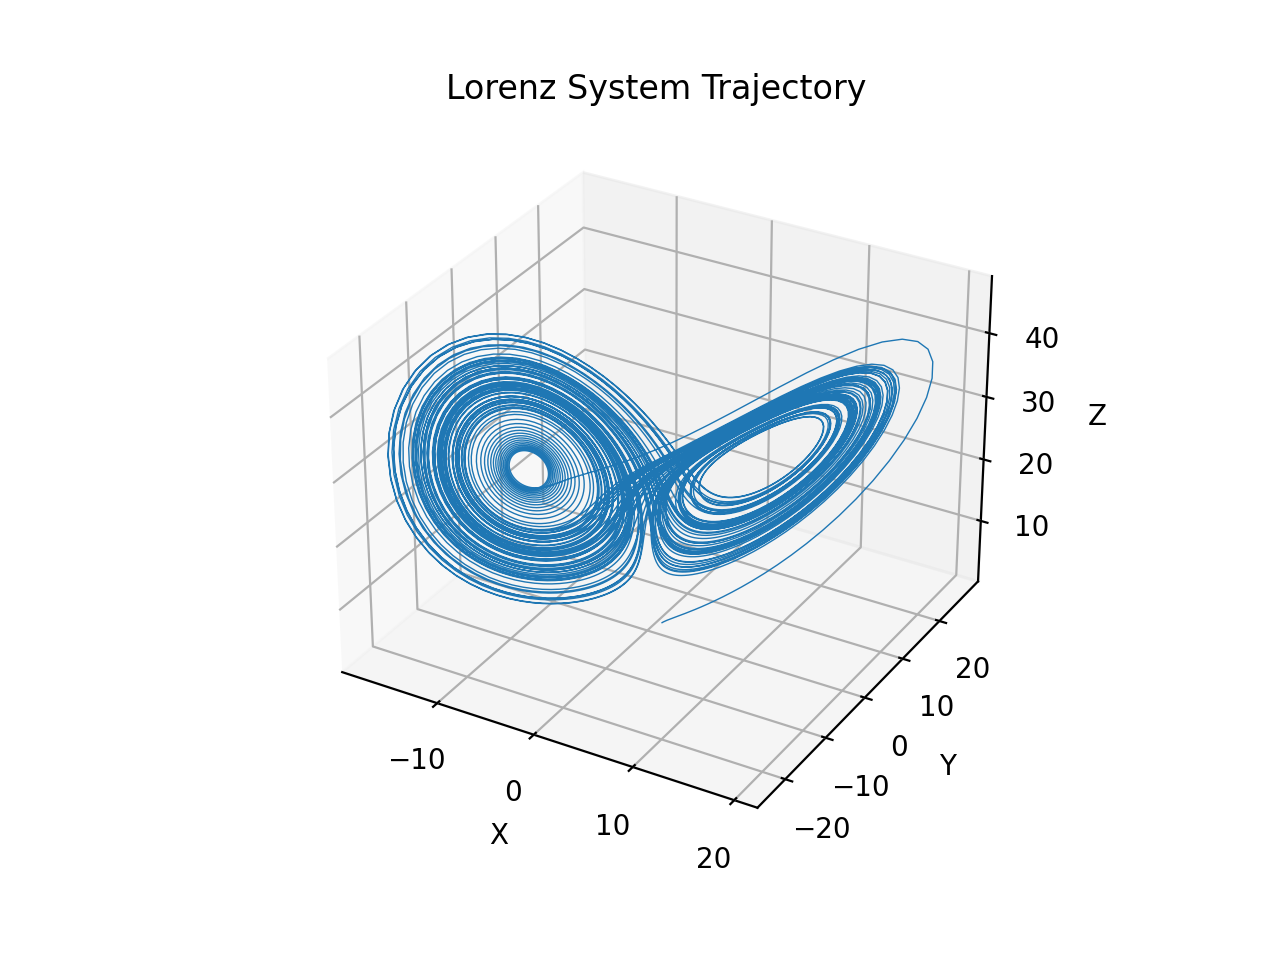

In [6]:
#plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_list, y_list, z_list, lw=.5)
ax.set_title("Lorenz System Trajectory")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

<IPython.core.display.Javascript object>


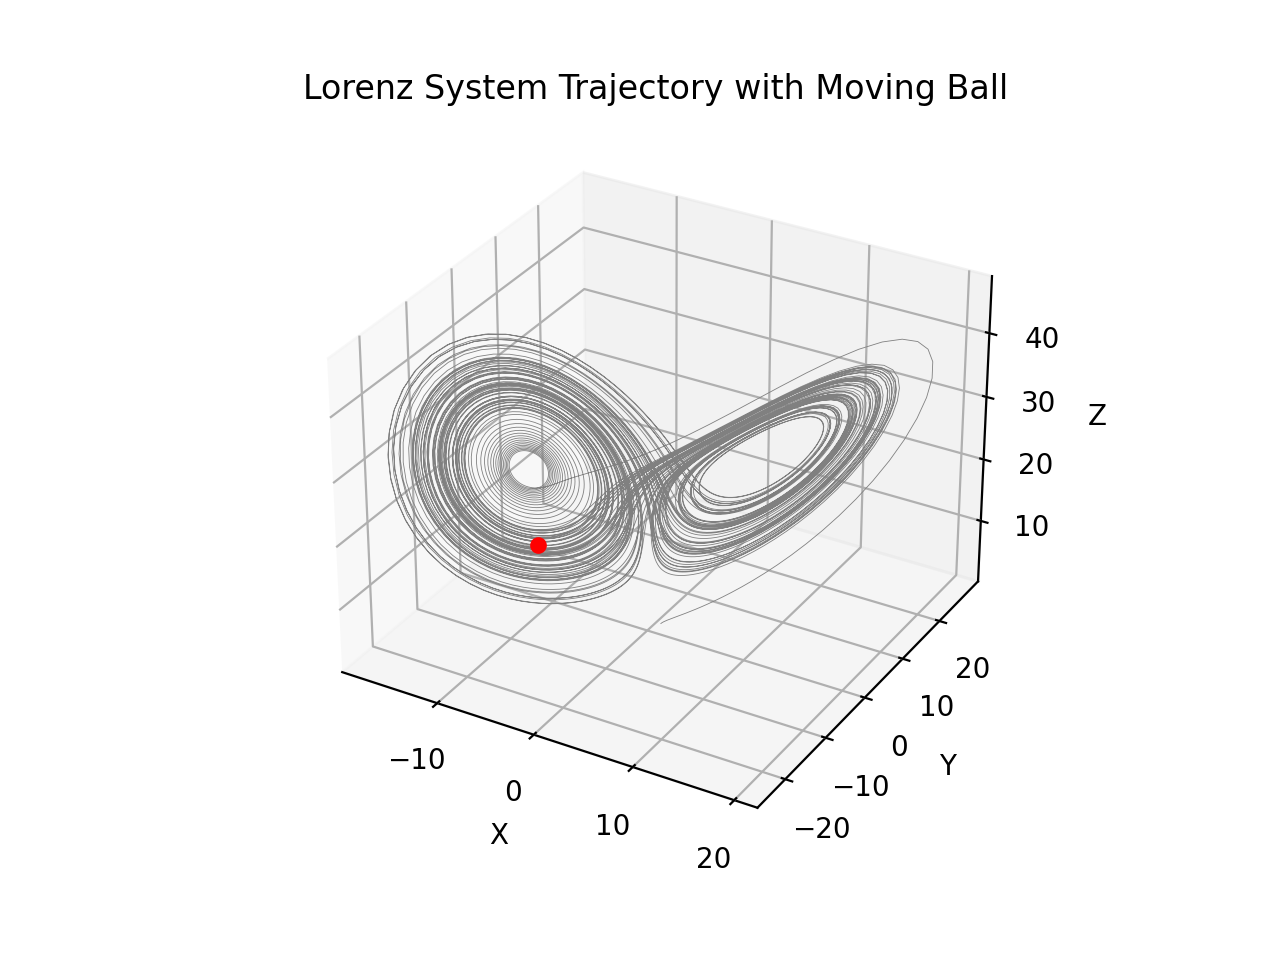

/var/folders/r_/pt3dpzs942xd7tvd_1w7qhwc0000gn/T/ipykernel_6108/2742570933.py:17: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  scatter.set_data(x[num], y[num])


In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_list, y_list, z_list, lw=.3, color='grey')  # Plot the trajectory

# Scatter point for the moving ball
scatter, = ax.plot([], [], [], 'ro', ms=5)  # 'ro' means red color, 'o' marker, and ms is marker size

def update(num, x, y, z, scatter):
    scatter.set_data(x[num], y[num])
    scatter.set_3d_properties(z[num])  # 3D scatter data update
    return scatter,

ani = FuncAnimation(fig, update, frames=len(x_list), interval=5, fargs=[x_list, y_list, z_list, scatter], blit=False)
ax.set_title("Lorenz System Trajectory with Moving Ball")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()
ani.save('lorenz_animation.gif', writer='pillow', fps=30)
